/tmp/ipykernel_14143/2477793706.py:38: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  mapa_calor = ax.pcolormesh(X,Y,U_pol, cmap='plasma', vmin=-100, vmax=100)


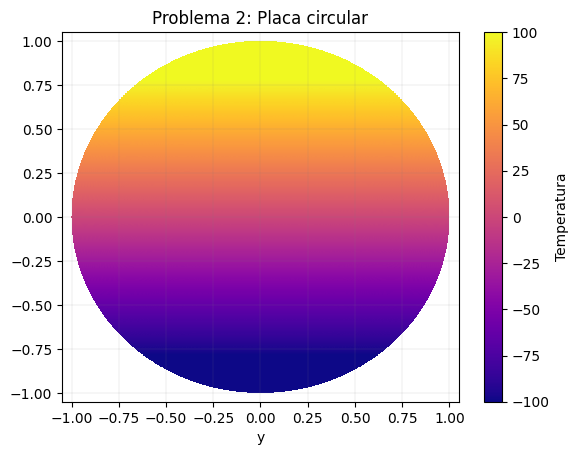

In [1]:
# Se utilizan las siguientes bibliotecas:
import matplotlib.pyplot as plt    # Para las gráficas
import numpy as np                 # Para el uso de arrays
from IPython.display import HTML            # Para poder visualizar la animación en el notebook

# La siguiente instrucción se utiliza para habilitar el modo interactivo en el notebook
%matplotlib inline

# Parámetros del problema
N = 2000                      # Número de puntos para la discretización del dominio espacial
theta = np.linspace(-np.pi,np.pi, N + 1)   # Puntos en el intervalo [0,π]
r = np.linspace(0,1,N + 1 )   # Puntos en el intervalo [0,1]
R,Theta = np.meshgrid(r,theta)
U_pol = np.zeros((N+1,N+1))  # Matriz que guardará la solución para cada (theta,r)


def coeff(n):
    if n%2 == 0:
        coeff = 0
    else:
        coeff = 4/(np.pi*n)
    return coeff

def sol():
    sol = np.zeros((N+1,N+1))
    for m in range(1,3):
        sol = 100*coeff(m)*np.power(R,m)*np.sin(m*Theta) + sol
    return sol

U_pol = sol()  # solución en coordenadas polares

# Método para transformar a coordenadas cartesianas y graficar
X = R*np.cos(Theta)
Y = R*np.sin(Theta)

# Se crea la figura y se fijan parámetros
fig,ax= plt.subplots()
mapa_calor = ax.pcolormesh(X,Y,U_pol, cmap='plasma', vmin=-100, vmax=100)

# Añadir una barra de color
calor_bar = plt.colorbar(mapa_calor)
calor_bar.set_label('Temperatura')

# Ajustes de los ejes, etiquetas y título
ax.set_title('Problema 2: Placa circular')
ax.grid(color='grey', linestyle='-', linewidth=0.1)
ax.set_ylim([-1.05, 1.05])      # Se fijan los límites del eje y
ax.set_xlim([-1.05, 1.05]) # Se fijan los límites del eje x
ax.set_xlabel('x')
ax.set_xlabel('y')
plt.show() # Mostrar gráfico
#plt.savefig("Problema2.PlacaCircular.2.png")



In [3]:
7%2

1